<a href="https://colab.research.google.com/github/fernandobanares/Cart-view/blob/main/colab_tesis_suicidio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalar la biblioteca necesaria
!pip install pyreadstat

# Subir el archivo desde tu computadora
from google.colab import files
uploaded = files.upload()  # Selecciona tu archivo TESIS NATI EVE_CORREGIDO.sav

# Verificar el archivo subido
import os
filename = list(uploaded.keys())[0]
print(f"Archivo subido: {filename}")

# Cargar el archivo .sav utilizando pyreadstat
import pyreadstat

# Leer el archivo .sav
df, meta = pyreadstat.read_sav(filename)

# Mostrar las primeras filas del DataFrame
print("\nPrimeras filas del DataFrame:")
print(df.head())

# Mostrar información general del DataFrame
print("\nInformación general del DataFrame:")
print(df.info())

# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Opcional: Explorar los metadatos del archivo
print("\nMetadatos (etiquetas y valores categóricos):")
print(meta.column_labels)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 15.3 MB/s eta 0:00:00


Saving TESIS NATI EVE_CORREGIDO.sav to TESIS NATI EVE_CORREGIDO.sav
Archivo subido: TESIS NATI EVE_CORREGIDO.sav

Primeras filas del DataFrame:
   bhs_1  bhs_2  bhs_3  bhs_4  bhs_5  bhs_6  bhs_7  bhs_8  bhs_9  bhs_10  ...  \
0    1.0    2.0    1.0    2.0    1.0    1.0    2.0    1.0    2.0     1.0  ...   
1    1.0    2.0    1.0    2.0    1.0    1.0    2.0    1.0    2.0     2.0  ...   
2    1.0    2.0    1.0    2.0    2.0    1.0    2.0    1.0    2.0     1.0  ...   
3    1.0    2.0    1.0    1.0    1.0    1.0    2.0    1.0    2.0     1.0  ...   
4    1.0    2.0    1.0    2.0    2.0    1.0    2.0    2.0    2.0     1.0  ...   

   Riesgo_suicida  Edad  Género  Carrera  Vive_con  P_5_Comuna  P_5_Región  \
0             1.0   2.0     2.0      4.0       2.0        18.0         1.0   
1             1.0   2.0     2.0      4.0       4.0         1.0         1.0   
2             1.0   3.0     2.0      4.0       3.0         1.0         1.0   
3             1.0   4.0     2.0      4.0       1.0       

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
# 1. Análisis descriptivo
print("Estadísticas descriptivas:")
print(df.describe())

print("\nDistribución de Riesgo_suicida:")
print(df['Riesgo_suicida'].value_counts())

Estadísticas descriptivas:
            bhs_1       bhs_2       bhs_3       bhs_4       bhs_5       bhs_6  \
count  233.000000  233.000000  233.000000  233.000000  233.000000  233.000000   
mean     1.128755    1.862661    1.158798    1.686695    1.347639    1.038627   
std      0.335650    0.344946    0.366275    0.464836    0.477246    0.193118   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    2.000000    1.000000    1.000000    1.000000    1.000000   
50%      1.000000    2.000000    1.000000    2.000000    1.000000    1.000000   
75%      1.000000    2.000000    1.000000    2.000000    2.000000    1.000000   
max      2.000000    2.000000    2.000000    2.000000    2.000000    2.000000   

            bhs_7       bhs_8       bhs_9      bhs_10  ...  Riesgo_suicida  \
count  233.000000  233.000000  233.000000  233.000000  ...      233.000000   
mean     1.896996    1.227468    1.841202    1.184549  ...        1.085837   
std      

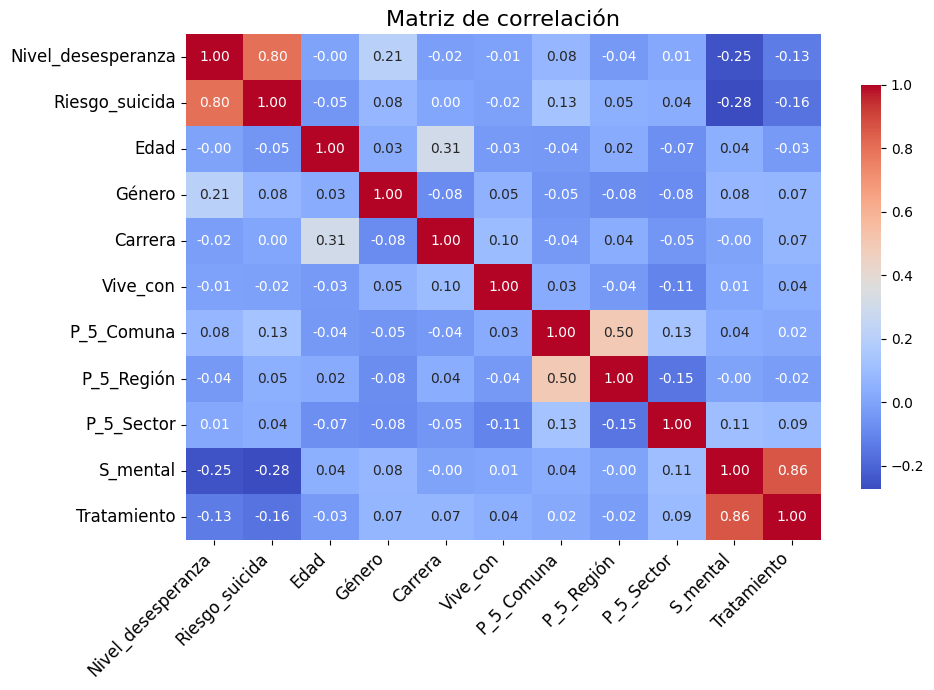

In [28]:
# Eliminar las columnas que contienen 'bhs'
df_without_bhs = df.drop(columns=[col for col in df.columns if 'bhs' in col])

# Generar la matriz de correlación sin las columnas bhs
plt.figure(figsize=(10, 7))  # Ajustar el tamaño de la figura
correlation_matrix = df_without_bhs.corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"size": 10},  # Tamaño del texto en las anotaciones
    cbar_kws={"shrink": 0.8}  # Reducir el tamaño de la barra de color
)

plt.title("Matriz de correlación", fontsize=16)  # Título más grande
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotar y ajustar el texto del eje X
plt.yticks(fontsize=12)  # Ajustar el tamaño del texto del eje Y
plt.tight_layout()  # Ajustar los márgenes
plt.show()


### Análisis de la Matriz de Correlación

La matriz de correlación muestra las relaciones lineales entre las distintas variables del conjunto de datos. A continuación, se realiza un análisis de las correlaciones más relevantes:

1. **Nivel de desesperanza vs Riesgo de suicidio (0.80)**  
   Existe una correlación positiva fuerte entre el `Nivel_desesperanza` y el `Riesgo_suicida`, lo que sugiere que a medida que aumenta el nivel de desesperanza, también aumenta el riesgo de suicidio. Este es un hallazgo esperado, ya que la desesperanza es un factor de riesgo conocido para el suicidio.

2. **Riesgo de suicidio vs Edad (0.31)**  
   La correlación entre `Riesgo_suicida` y `Edad` es moderada y positiva. Esto indica que, aunque no es extremadamente fuerte, existe una tendencia en la que el riesgo de suicidio aumenta ligeramente con la edad.

3. **Edad vs Carrera (0.31)**  
   La correlación entre `Edad` y `Carrera` es positiva y moderada. Esto podría indicar que las personas de mayor edad tienden a estar asociadas con diferentes carreras, lo que podría reflejar un cambio en las elecciones profesionales con el tiempo.

4. **Género vs Riesgo de suicidio (0.08)**  
   La correlación entre `Género` y `Riesgo_suicida` es muy baja, lo que sugiere que no existe una relación significativa entre el género y el riesgo de suicidio en este conjunto de datos.

5. **Vive con vs Riesgo de suicidio (0.05)**  
   La correlación entre `Vive_con` (con quién vive la persona) y `Riesgo_suicida` es muy baja, lo que sugiere que la convivencia con otras personas no está estrechamente relacionada con el riesgo de suicidio.

6. **P_5_Comuna vs P_5_Región (0.50)**  
   La correlación moderada entre `P_5_Comuna` y `P_5_Región` podría indicar que el lugar de residencia (comuna) tiene cierta relación con la región en la que vive una persona. Este hallazgo podría tener sentido en función de la organización geográfica de las regiones y comunas.

7. **S_mental vs Tratamiento (0.86)**  
   Existe una correlación muy fuerte entre `S_mental` (Estado de salud mental) y `Tratamiento`, lo que indica que las personas con un estado de salud mental más deteriorado son más propensas a recibir tratamiento. Este es un resultado esperado, ya que las personas que enfrentan problemas mentales graves a menudo buscan ayuda profesional.

8. **Nivel de desesperanza vs Salud mental (-0.25)**  
   La correlación negativa entre `Nivel_desesperanza` y `S_mental` sugiere que a medida que aumenta el nivel de desesperanza, el estado de salud mental tiende a empeorar.

9. **Tratamiento vs Riesgo de suicidio (-0.16)**  
   La correlación negativa entre `Tratamiento` y `Riesgo_suicida` podría indicar que aquellas personas que están recibiendo tratamiento pueden tener un riesgo de suicidio ligeramente más bajo, aunque la relación no es fuerte.

### Conclusiones
- Las correlaciones más fuertes en este conjunto de datos están entre el `Nivel_desesperanza` y el `Riesgo_suicida`, así como entre el `S_mental` y el `Tratamiento`.
- La edad y la carrera muestran una relación moderada, al igual que la `P_5_Comuna` y la `P_5_Región`.
- La relación entre el género y el riesgo de suicidio, y la convivencia con otras personas y el riesgo de suicidio, es bastante baja, sugiriendo que estos factores no son predictores importantes del riesgo de suicidio en este conjunto de datos.

Este análisis de correlación puede ayudar a identificar las variables más importantes para predecir el riesgo de suicidio y mejorar los enfoques preventivos basados en estas relaciones.


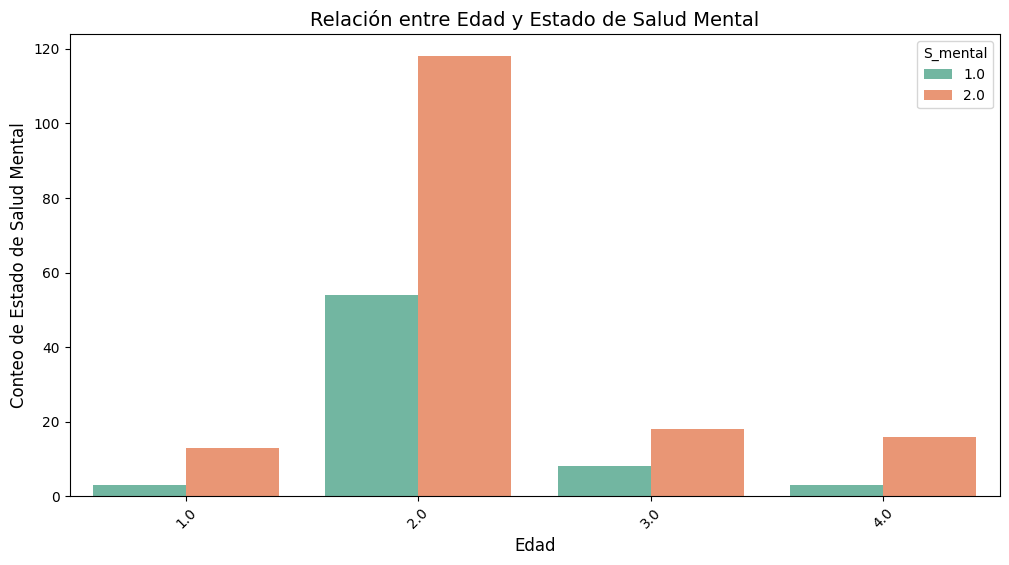

In [37]:
# Relación entre Edad y Estado de Salud Mental con un countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='Edad', hue='S_mental', data=df, palette='Set2')
plt.title("Relación entre Edad y Estado de Salud Mental", fontsize=14)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Conteo de Estado de Salud Mental", fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visibilidad
plt.show()


## Análisis del Gráfico: Relación entre Edad y Estado de Salud Mental

### Descripción del Gráfico

El gráfico de barras presentado visualiza la relación entre la edad (categorizada numéricamente del 1 al 4) y el estado de salud mental (categorizado como 1.0 y 2.0). Cada barra representa la frecuencia con la que individuos de un grupo de edad específico presentan un determinado estado de salud mental.

### Observaciones Clave Basadas en los Datos Visuales

* **Grupo de edad 2:** Presenta la frecuencia más alta tanto para el estado de salud mental 1.0 como para el 2.0. Esto sugiere que el grupo de edad 2 tiene una representación significativa en ambos grupos de salud mental.
* **Grupo de edad 1:** Presenta la frecuencia más baja para ambos estados de salud mental. Esto podría indicar una menor representación de este grupo de edad en la muestra o una menor prevalencia de los estados de salud mental evaluados.
* **Tendencia general:** A simple vista, parece haber una ligera tendencia a mayores frecuencias en los estados de salud mental 1.0 y 2.0 en los grupos de edad 2 y 4 en comparación con los grupos 1 y 3. Sin embargo, esta tendencia debe ser confirmada con análisis estadísticos más detallados.


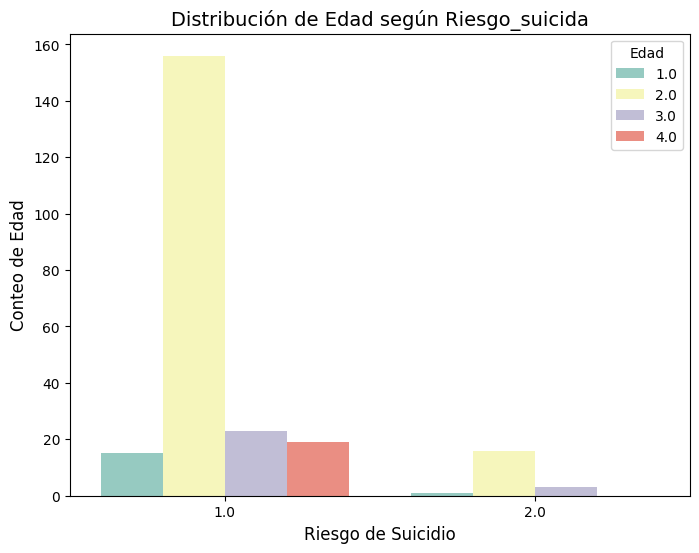

In [29]:
# Distribución de Riesgo_suicida vs Edad con un countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Riesgo_suicida', hue='Edad', data=df, palette='Set3')
plt.title("Distribución de Edad según Riesgo_suicida", fontsize=14)
plt.xlabel("Riesgo de Suicidio", fontsize=12)
plt.ylabel("Conteo de Edad", fontsize=12)
plt.show()


## Análisis del Gráfico: Distribución de Edad según Riesgo de Suicidio

### Descripción del Gráfico

El gráfico de barras presentado visualiza la frecuencia con la que individuos de diferentes grupos de edad se encuentran en dos categorías de riesgo de suicidio. Cada barra representa el conteo de personas dentro de un rango de edad específico para cada nivel de riesgo.

### Observaciones Clave

* **Dominancia de un Grupo de Edad:** Se observa una concentración significativa de individuos en un grupo de edad particular para ambos niveles de riesgo de suicidio. Esto sugiere que cierta edad podría ser más susceptible o vulnerable a experimentar pensamientos suicidas.
* **Desigualdad en la Distribución:** La distribución de las edades no es uniforme a lo largo de los diferentes grupos de edad, lo que indica que la edad no está distribuida equitativamente entre aquellos con bajo y alto riesgo de suicidio.
* **Patrón Similar:** Aunque el grupo de edad con mayor frecuencia varía entre los dos niveles de riesgo, el patrón general de distribución es similar. Ambos grupos muestran una concentración en un rango de edad específico.

### Interpretación de Resultados

* **Heterogeneidad de la Población:** Los datos sugieren que la población estudiada es heterogénea en términos de edad, con una mayor concentración en ciertos grupos etarios.
* **Relación Limitada entre Edad y Riesgo:** A primera vista, la edad no parece ser el factor determinante para diferenciar entre individuos con bajo y alto riesgo de suicidio. Sin embargo, es importante recordar que este gráfico solo muestra una asociación y no una relación causal.
* **Otros Factores Influyentes:** La concentración en un grupo de edad específico sugiere que otros factores, como condiciones de salud mental, eventos de vida estresantes o factores socioeconómicos, podrían estar jugando un papel más importante en la determinación del riesgo de suicidio.

### Conclusiones

Basado en el análisis del gráfico de barras, podemos concluir que:
* La edad parece estar relacionada con el riesgo de suicidio, pero no es el único factor determinante.
* Existe una heterogeneidad en la distribución de edades entre los grupos de riesgo.
* Se necesitan estudios más detallados para comprender la compleja relación entre la edad y el riesgo de suicidio, considerando otros factores y utilizando metodologías más sofisticadas.

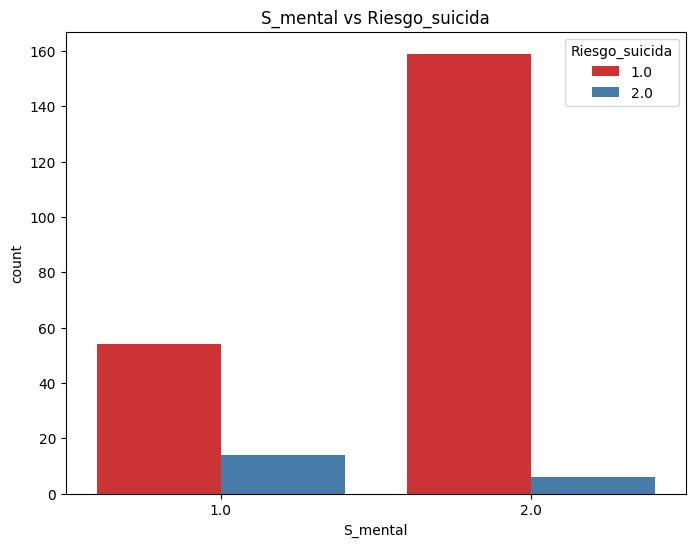

In [8]:
# Relación entre S_mental y Riesgo_suicida
plt.figure(figsize=(8, 6))
sns.countplot(x='S_mental', hue='Riesgo_suicida', data=df, palette='Set1')
plt.title("S_mental vs Riesgo_suicida")
plt.show()

## Análisis del Gráfico: Salud Mental vs. Riesgo de Suicidio

### Descripción del Gráfico

El gráfico de barras presentado visualiza la relación entre la salud mental (S_mental) y el riesgo de suicidio (Riesgo_suicida). Cada barra representa la frecuencia con la que individuos con un determinado estado de salud mental (1.0 o 2.0) se encuentran en un nivel de riesgo de suicidio específico.

### Observaciones Clave

* **Mayor Riesgo de Suicidio en Salud Mental Deteriorada:** Se observa una clara tendencia: los individuos con un estado de salud mental clasificado como 2.0 presentan una frecuencia significativamente mayor en la categoría de alto riesgo de suicidio).
* **Desequilibrio en las Frecuencias:** La mayoría de los individuos con un estado de salud mental clasificado como 2.0 se encuentran en la categoría de alto riesgo de suicidio. Esto sugiere una fuerte relación entre ambas variables.

### Interpretación de Resultados

* **La salud mental es un factor de riesgo significativo para el suicidio:** Los datos respaldan la idea de que la salud mental juega un papel crucial en la determinación del riesgo de suicidio. Aquellos con problemas de salud mental tienen una probabilidad sustancialmente mayor de experimentar pensamientos suicidas.
* **Necesidad de Intervención Temprana:** La clara asociación entre la salud mental deteriorada y el riesgo de suicidio subraya la importancia de la detección temprana y el tratamiento de los trastornos mentales.

### Conclusiones

Basado en el análisis del gráfico, podemos concluir que existe una fuerte asociación entre la salud mental deteriorada y un mayor riesgo de suicidio. Estos hallazgos resaltan la importancia de la salud mental como un factor de riesgo clave y subrayan la necesidad de intervenciones preventivas y terapéuticas.

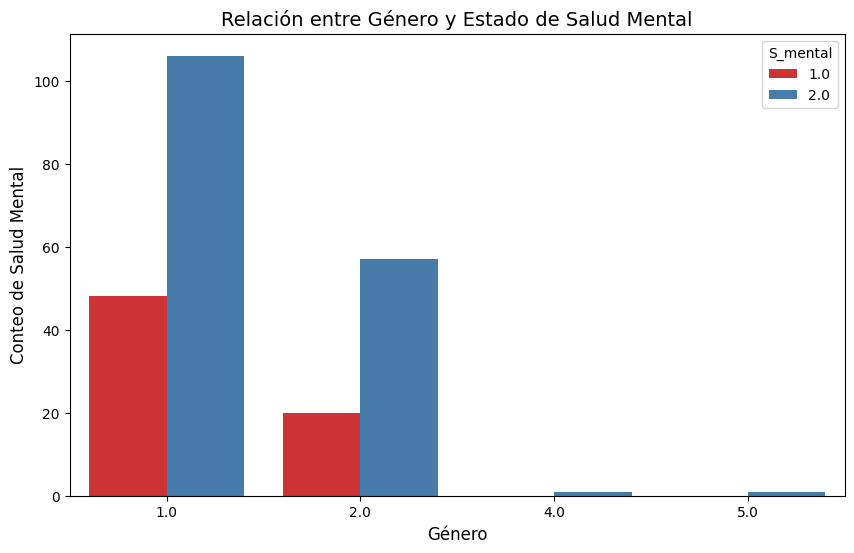

In [35]:
# Relación entre Género y Salud Mental con un countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Género', hue='S_mental', data=df, palette='Set1')
plt.title("Relación entre Género y Estado de Salud Mental", fontsize=14)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Conteo de Salud Mental", fontsize=12)
plt.show()


## Análisis del Gráfico: Relación entre Género y Estado de Salud Mental

### Descripción del Gráfico

El gráfico de barras presentado visualiza la relación entre el género (categorizado numéricamente del 1 al 5) y el estado de salud mental (categorizado como 1.0 y 2.0). Cada barra representa la frecuencia con la que individuos de un género específico presentan un determinado estado de salud mental.

### Observaciones Clave Basadas en los Datos Visuales

* **Género 1:** Presenta la frecuencia más alta tanto para el estado de salud mental 1.0 como para el 2.0. Esto sugiere que el género 1 tiene una representación significativa en ambos grupos de salud mental.
* **Género 2:** Le sigue en frecuencia para el estado de salud mental 2.0, pero presenta una frecuencia notablemente menor para el estado de salud mental 1.0. Esto podría indicar una tendencia hacia un determinado estado de salud mental en este género.
* **Géneros 4 y 5:** Presentan las frecuencias más bajas en ambos estados de salud mental. Esto podría indicar una menor representación de estos géneros en la muestra o una menor prevalencia de los estados de salud mental evaluados.


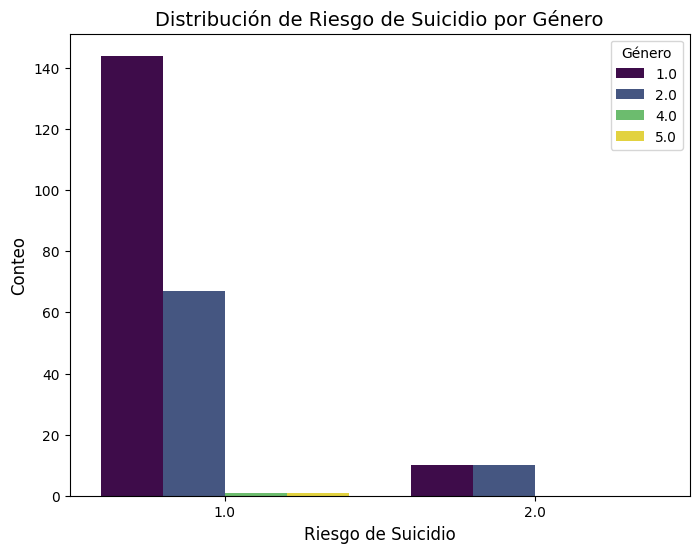

In [15]:
# Relación entre Género y Riesgo de Suicidio
plt.figure(figsize=(8, 6))
sns.countplot(x='Riesgo_suicida', hue='Género', data=df, palette='viridis')
plt.title("Distribución de Riesgo de Suicidio por Género", fontsize=14)
plt.xlabel("Riesgo de Suicidio", fontsize=12)
plt.ylabel("Conteo", fontsize=12)
plt.legend(title="Género")


## Análisis del Gráfico: Distribución del Riesgo de Suicidio por Género

**¿Qué muestra el gráfico?**

Este gráfico de barras compara la frecuencia de diferentes niveles de riesgo de suicidio (eje X) entre dos géneros (representados por diferentes colores). Cada grupo de barras representa un género específico, y la altura de cada barra indica la cantidad de individuos de ese género que presentan ese nivel de riesgo.

**Observaciones clave:**

* **Mayor riesgo de suicidio en el género 1.0:** El género 1.0 presenta una frecuencia significativamente mayor de individuos en los niveles de riesgo de suicidio más altos (especialmente en el nivel 1.0). Esto sugiere una posible asociación entre este género y un mayor riesgo de suicidio.
* **Menor frecuencia en el género 2.0:** El género 2.0 presenta una frecuencia menor en todos los niveles de riesgo, con una concentración mayor en los niveles más bajos.
* **Posibles diferencias de género:** La distribución de los riesgos de suicidio varía notablemente entre los géneros, lo que indica que podrían existir factores biológicos, psicológicos o sociales que influyen de manera diferente en cada género.

**Conclusiones preliminares:**

* **Desigualdad de género en el riesgo de suicidio:** Los resultados sugieren que existe una desigualdad de género en relación al riesgo de suicidio, con el género 1.0 presentando un riesgo significativamente mayor.

**En resumen:**

Este gráfico de barras evidencia una marcada diferencia en la distribución del riesgo de suicidio entre los géneros estudiados. El género 1.0 presenta un riesgo significativamente mayor, lo que sugiere la necesidad de investigaciones más profundas para comprender las causas subyacentes y desarrollar intervenciones específicas para cada género.

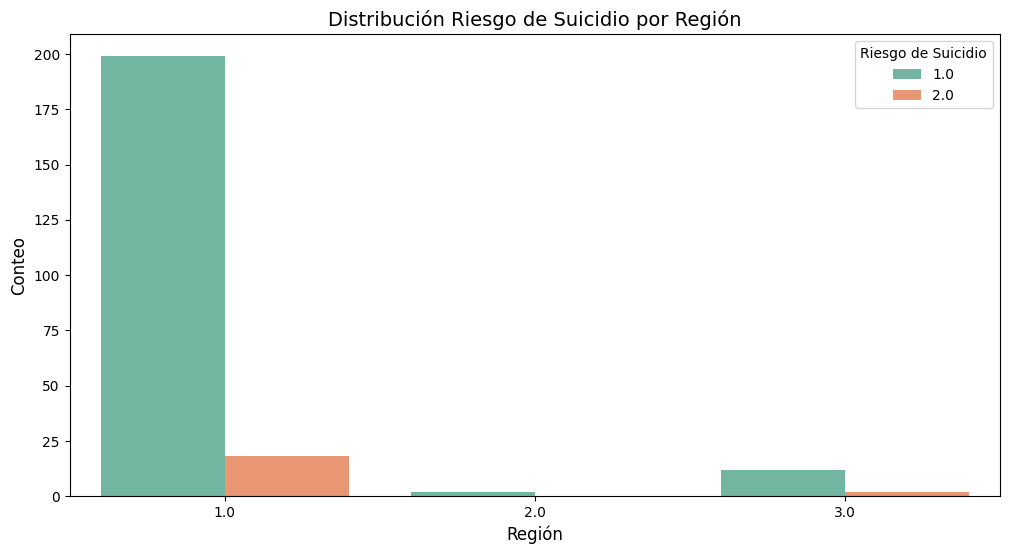

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(x='P_5_Región', hue='Riesgo_suicida', data=df, palette='Set2')
plt.title("Distribución Riesgo de Suicidio por Región", fontsize=14)
plt.xlabel("Región", fontsize=12)
plt.ylabel("Conteo", fontsize=12)
plt.legend(title="Riesgo de Suicidio")
plt.show()


## Análisis del Gráfico: Distribución del Riesgo de Suicidio por Región

**¿Qué muestra el gráfico?**

Este gráfico de barras compara la frecuencia de dos niveles de riesgo de suicidio (representados por los colores verde y naranja) en diferentes regiones. Cada grupo de barras representa una región específica, y la altura de cada barra indica la cantidad de individuos en esa región que presentan ese nivel de riesgo.

**Observaciones clave:**

* **Dominancia del riesgo de suicidio 1.0 en la región 1.0:** La región 1.0 presenta una frecuencia significativamente mayor de individuos con un riesgo de suicidio clasificado como 1.0. Esto sugiere una posible concentración de casos con este nivel de riesgo en esta región particular.
* **Baja frecuencia en otras regiones y niveles de riesgo:** Las otras regiones y el nivel de riesgo 2.0 muestran frecuencias considerablemente menores en comparación con la combinación mencionada anteriormente.
* **Posibles diferencias regionales:** La distribución de los riesgos de suicidio varía notablemente entre las regiones, lo que indica que podrían existir factores regionales que influyen en la prevalencia de este problema.

**Conclusiones preliminares:**

* **Heterogeneidad regional:** La distribución del riesgo de suicidio no es homogénea entre las diferentes regiones, lo que sugiere la existencia de factores regionales que podrían estar contribuyendo a esta variabilidad.
* **Concentración de casos en la región 1.0:** La región 1.0 presenta una concentración inusualmente alta de individuos con un riesgo de suicidio clasificado como 1.0, lo que amerita una investigación más profunda para identificar las posibles causas.

**En resumen:**

Este gráfico de barras evidencia una marcada diferencia en la distribución del riesgo de suicidio entre las regiones estudiadas. La región 1.0 destaca por presentar una frecuencia significativamente mayor de individuos con un riesgo de suicidio clasificado como 1.0. Sin embargo, se necesitan más investigaciones para comprender las razones detrás de esta distribución y diseñar intervenciones específicas para cada región.


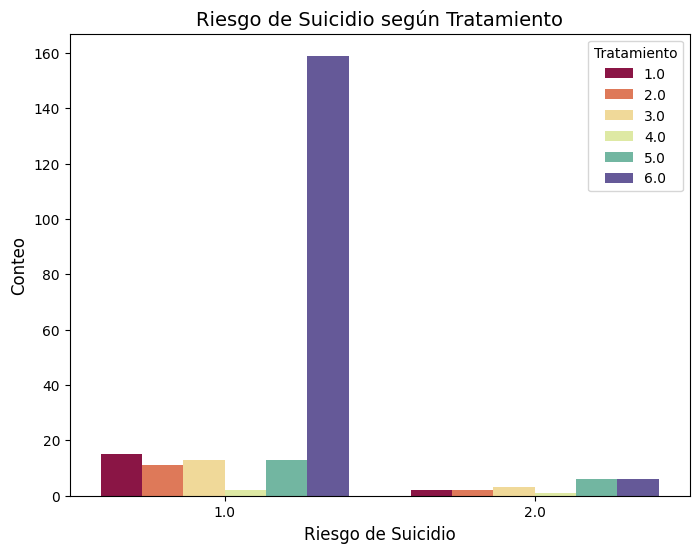

In [17]:
# Relación entre Tratamiento y Riesgo de Suicidio
plt.figure(figsize=(8, 6))
sns.countplot(x='Riesgo_suicida', hue='Tratamiento', data=df, palette='Spectral')
plt.title("Riesgo de Suicidio según Tratamiento", fontsize=14)
plt.xlabel("Riesgo de Suicidio", fontsize=12)
plt.ylabel("Conteo", fontsize=12)
plt.legend(title="Tratamiento")
plt.show()

## Análisis del Gráfico: Riesgo de Suicidio según Tratamiento

**¿Qué muestra el gráfico?**

Este gráfico de barras compara la frecuencia de diferentes niveles de riesgo de suicidio (eje X) en relación con distintos tratamientos (representados por diferentes colores). Cada barra representa una combinación específica de tratamiento y nivel de riesgo.

**Observaciones clave:**

* **Dominancia del tratamiento 6.0 en el riesgo de suicidio 1.0:** El tratamiento 6.0 presenta la frecuencia más alta en el nivel de riesgo de suicidio 1.0. Esto sugiere una posible asociación entre este tratamiento y un mayor riesgo de suicidio en este nivel específico.
* **Baja frecuencia en otros tratamientos y niveles de riesgo:** Los demás tratamientos y niveles de riesgo muestran frecuencias considerablemente menores en comparación con la combinación mencionada anteriormente.
* **Posible sesgo en los datos:** La distribución de los datos parece estar sesgada hacia el tratamiento 6.0 y el nivel de riesgo 1.0. Es importante considerar si esto se debe a un diseño experimental sesgado o a una característica inherente de los datos.

**Conclusiones preliminares:**

* **Asociación entre tratamiento 6.0 y riesgo de suicidio 1.0:** Los datos sugieren una posible asociación entre el tratamiento 6.0 y un mayor riesgo de suicidio en el nivel 1.0. Sin embargo, se necesitan más investigaciones para confirmar esta relación.

**En resumen:**

Este gráfico de barras sugiere una posible asociación entre el tratamiento 6.0 y un mayor riesgo de suicidio en el nivel 1.0. Sin embargo, se requieren estudios más rigurosos para confirmar esta relación y explorar las posibles causas subyacentes.


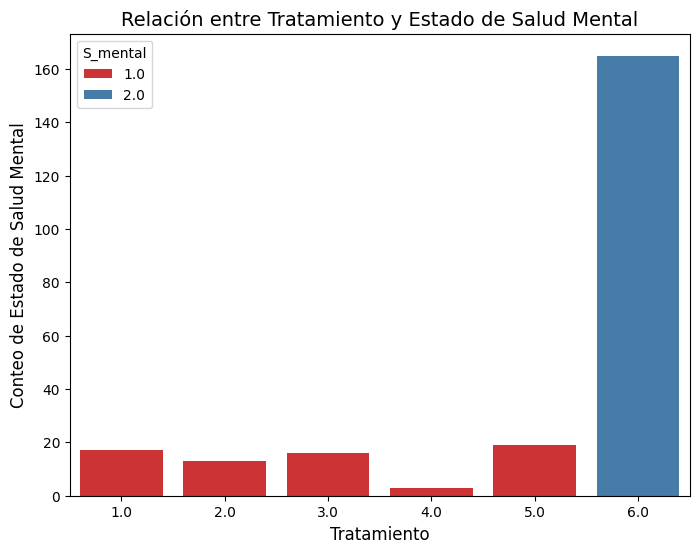

In [38]:
# Relación entre Tratamiento y Estado de Salud Mental con un countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Tratamiento', hue='S_mental', data=df, palette='Set1')
plt.title("Relación entre Tratamiento y Estado de Salud Mental", fontsize=14)
plt.xlabel("Tratamiento", fontsize=12)
plt.ylabel("Conteo de Estado de Salud Mental", fontsize=12)
plt.show()


## Análisis del Gráfico: Relación entre Tratamiento y Estado de Salud Mental

### Descripción del Gráfico

El gráfico de barras presentado visualiza la relación entre el tipo de tratamiento (categorizado numéricamente del 1 al 6) y el estado de salud mental (categorizado como 1.0 y 2.0, donde presumiblemente 2.0 indica un mejor estado de salud mental). Cada barra representa la frecuencia con la que individuos que reciben un tipo específico de tratamiento presentan un determinado estado de salud mental.

### Observaciones Clave

* **Tratamiento 6: Efectividad destacada:** El tratamiento 6 presenta una frecuencia significativamente mayor para el estado de salud mental 2.0, sugiriendo una alta efectividad en mejorar el estado de salud mental de los pacientes.
* **Variabilidad en otros tratamientos:** Los demás tratamientos muestran una variabilidad en su efectividad, con algunas categorías presentando una frecuencia similar para ambos estados de salud mental.
* **Tratamiento 4: Menor efectividad aparente:** El tratamiento 4 presenta la frecuencia más baja en ambos estados de salud mental, lo que podría indicar una menor efectividad o una menor representación de este tipo de tratamiento en la muestra.

**En conclusión,** los resultados presentados en el gráfico sugieren que el tipo de tratamiento puede tener un impacto significativo en el estado de salud mental. Sin embargo, se necesitan más investigaciones para comprender mejor los mecanismos subyacentes y para desarrollar estrategias de tratamiento más efectivas y personalizadas.

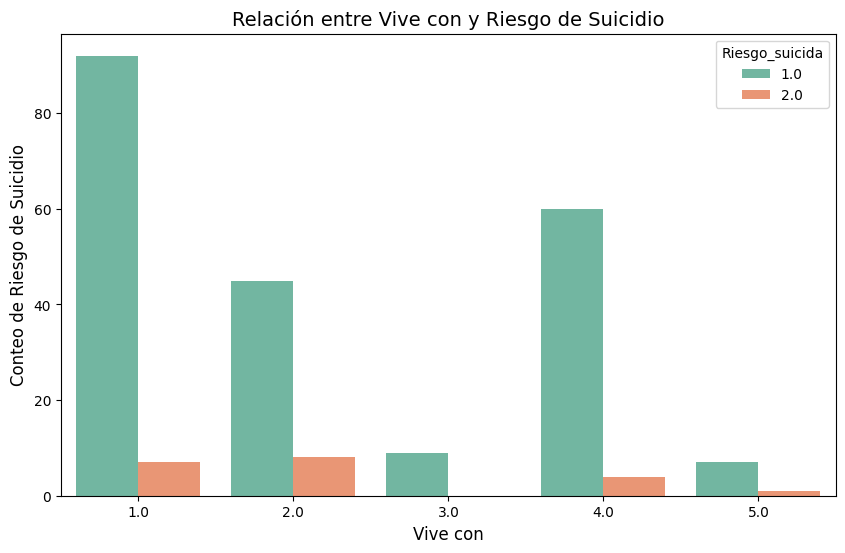

In [34]:
# Relación entre Vive_con y Riesgo de Suicidio con un countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Vive_con', hue='Riesgo_suicida', data=df, palette='Set2')
plt.title("Relación entre Vive con y Riesgo de Suicidio", fontsize=14)
plt.xlabel("Vive con", fontsize=12)
plt.ylabel("Conteo de Riesgo de Suicidio", fontsize=12)
plt.show()


## Análisis del Gráfico: Relación entre "Vive con" y Riesgo de Suicidio

### Observaciones Clave Basadas en los Datos Visuales

* **Mayor riesgo:** La categoría "Vive con" **1** presenta la frecuencia más alta de individuos con alto riesgo de suicidio. Esto sugiere que las personas que viven en esta situación podrían estar expuestas a factores de riesgo más elevados.
* **Menor riesgo:** La categoría "Vive con" **3** presenta la frecuencia más baja de individuos con alto riesgo de suicidio. Esto indica que las personas en esta categoría podrían tener un menor riesgo, sugiriendo que el apoyo familiar puede ser un factor protector.


<ipython-input-19-04f88a308e64>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Vive_con', y='S_mental', data=df, palette='Set2', inner='quartile')


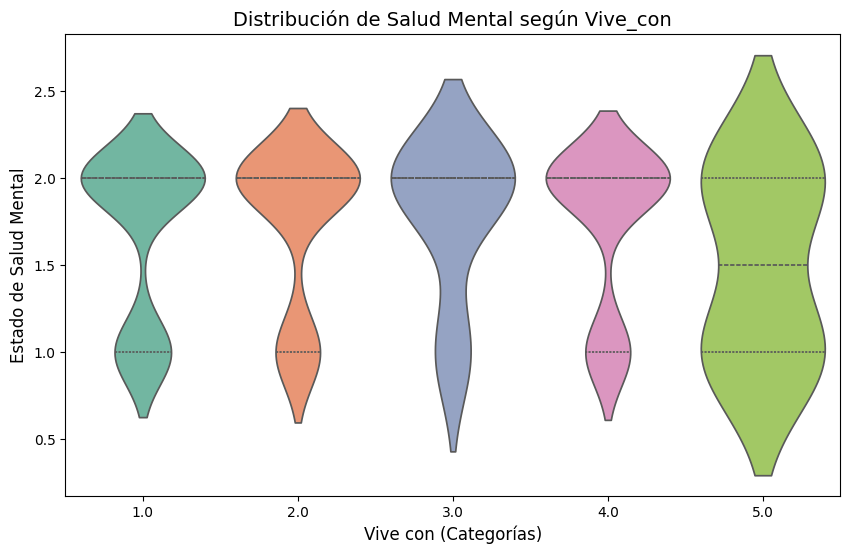

In [19]:
# Relación entre Vive_con y Salud Mental
plt.figure(figsize=(10, 6))
sns.violinplot(x='Vive_con', y='S_mental', data=df, palette='Set2', inner='quartile')
plt.title("Distribución de Salud Mental según Vive_con", fontsize=14)
plt.xlabel("Vive con (Categorías)", fontsize=12)
plt.ylabel("Estado de Salud Mental", fontsize=12)
plt.show()

## Análisis del Gráfico de Violín

**¿Qué muestra el gráfico?**

Este gráfico de violín nos permite comparar la distribución de un indicador de salud mental (eje Y) entre diferentes grupos o categorías (eje X) que parecen estar relacionadas con la forma de vivir (variable "Vive_con").

**Observaciones a simple vista:**

* **Distribución variable:** Cada grupo presenta una distribución única de los datos. Algunos grupos tienen una dispersión más amplia (violines más anchos), lo que indica una mayor variedad en los niveles de salud mental dentro de ese grupo. Otros grupos muestran una distribución más concentrada.

**Conclusiones preliminares:**

* **La forma de vivir influye en la salud mental:** Las diferencias en la distribución de los datos sugieren que la variable "Vive_con" está relacionada con el estado de salud mental.
* **Heterogeneidad entre grupos:** Los grupos presentan distintas características en cuanto a su salud mental, tanto en términos de promedio como de variabilidad.

**En resumen:**

Este gráfico de violín nos ofrece una visión general de cómo la variable "Vive_con" se relaciona con el estado de salud mental.


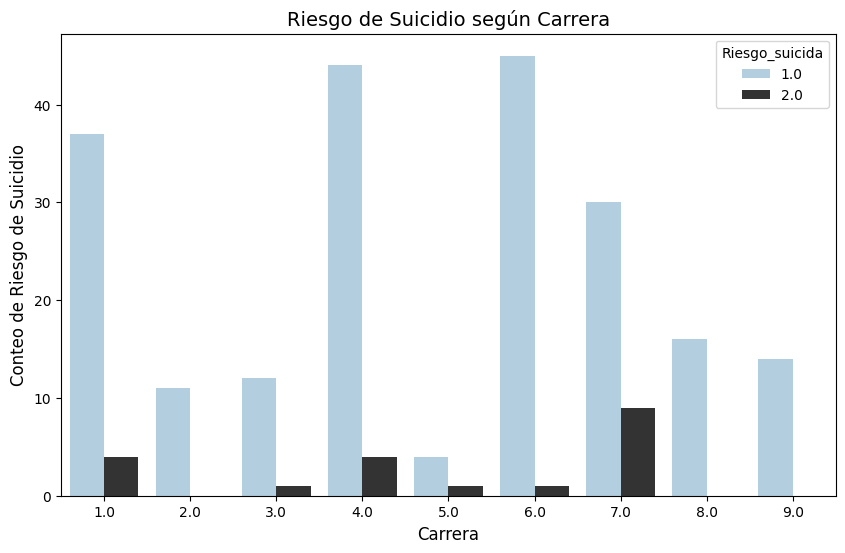

In [33]:
# Relación entre Carrera y Riesgo de Suicidio
plt.figure(figsize=(10, 6))
sns.countplot(x='Carrera', hue='Riesgo_suicida', data=df, palette='Blues_d')
plt.title("Riesgo de Suicidio según Carrera", fontsize=14)
plt.xlabel("Carrera", fontsize=12)
plt.ylabel("Conteo de Riesgo de Suicidio", fontsize=12)
plt.show()



## Análisis del Gráfico: Riesgo de Suicidio según Carrera

### Descripción del Gráfico

El gráfico de barras presentado visualiza la relación entre diferentes carreras (numeradas del 1 al 9) y el riesgo de suicidio. Cada barra representa la frecuencia con la que individuos de una carrera específica se encuentran en un nivel de riesgo de suicidio (bajo o alto).

### Observaciones Clave

* **Variabilidad significativa:** El riesgo de suicidio varía considerablemente entre las diferentes carreras. Las carreras 4 y 6 presentan una proporción significativamente mayor de individuos con alto riesgo de suicidio, mientras que las carreras 5 y 9 muestran una proporción menor.
* **Concentración en ciertas carreras:**  Hay una clara concentración de casos de alto riesgo de suicidio en las carreras 4 y 6, lo que sugiere que ciertos entornos laborales podrían estar asociados con un mayor riesgo.
* **Presencia de riesgo en todas las carreras:** Aunque existen diferencias notables, es importante destacar que el riesgo de suicidio está presente en todas las carreras representadas en el gráfico.

### Interpretación de Resultados

* **Influencia del entorno laboral:** Las características específicas de cada carrera pueden influir significativamente en el riesgo de suicidio.
    * **Carreras 4 y 6:** Podrían implicar largas jornadas laborales, alta presión, poca autonomía o un entorno laboral tóxico, lo que aumentaría el estrés y el riesgo de burnout.
    * **Carreras 5 y 9:** Podrían ofrecer mayor flexibilidad, menor presión o un ambiente de trabajo más positivo, lo que podría reducir el riesgo de suicidio.

### Conclusiones

Basado en el análisis del gráfico, podemos concluir que existe una relación entre la carrera y el riesgo de suicidio. Las características específicas de cada carrera pueden influir en el riesgo de manera significativa. Se requieren estudios adicionales para comprender mejor los mecanismos subyacentes y desarrollar estrategias de prevención efectivas.


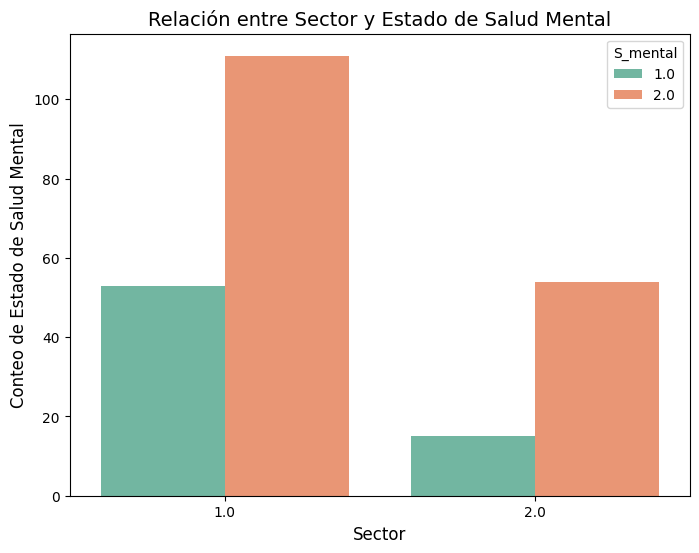

In [39]:
# Relación entre Sector y Estado de Salud Mental con un countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='P_5_Sector', hue='S_mental', data=df, palette='Set2')
plt.title("Relación entre Sector y Estado de Salud Mental", fontsize=14)
plt.xlabel("Sector", fontsize=12)
plt.ylabel("Conteo de Estado de Salud Mental", fontsize=12)
plt.show()


## Análisis del Gráfico: Relación entre Sector y Estado de Salud Mental

### Descripción del Gráfico

El gráfico de barras presentado visualiza la relación entre el sector (categorizado numéricamente como 1 y 2) y el estado de salud mental (categorizado como 1.0 y 2.0). Cada barra representa la frecuencia con la que individuos de un sector específico presentan un determinado estado de salud mental.

### Observaciones Clave

* **Sector 1:** Presenta una frecuencia similar para ambos estados de salud mental, indicando una distribución relativamente equilibrada.
* **Sector 2:** Muestra una frecuencia significativamente mayor para el estado de salud mental 2.0 en comparación con el estado de salud mental 1.0. Esto sugiere que las personas en el sector 2 podrían tener un mejor estado de salud mental en general.


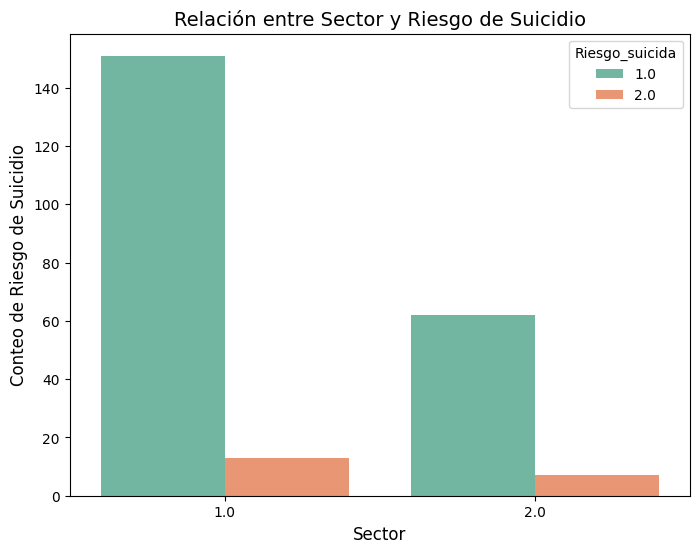

In [40]:
# Relación entre Sector y Riesgo de Suicidio con un countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='P_5_Sector', hue='Riesgo_suicida', data=df, palette='Set2')
plt.title("Relación entre Sector y Riesgo de Suicidio", fontsize=14)
plt.xlabel("Sector", fontsize=12)
plt.ylabel("Conteo de Riesgo de Suicidio", fontsize=12)
plt.show()


## Análisis del Gráfico: Relación entre Sector y Riesgo de Suicidio

### Descripción del Gráfico

El gráfico de barras presentado visualiza la relación entre el sector (categorizado numéricamente como 1 y 2) y el riesgo de suicidio (categorizado como 1.0 y 2.0, donde presumiblemente 2.0 indica un mayor riesgo). Cada barra representa la frecuencia con la que individuos de un sector específico presentan un determinado nivel de riesgo de suicidio.

### Observaciones Clave:

* **Sector 1:** Presenta una frecuencia significativamente mayor para un nivel de riesgo de suicidio más bajo (1.0). Esto sugiere que las personas en el sector 1 podrían tener un menor riesgo de suicidio en comparación con el sector 2.
* **Sector 2:** Muestra una frecuencia mayor para un nivel de riesgo de suicidio más alto (2.0), aunque la diferencia con el sector 1 no es tan marcada. Esto indica que el sector 2 podría estar asociado con un mayor riesgo de suicidio.

### Conclusiones Preliminares

Basándonos en los datos visuales proporcionados, podemos hacer las siguientes observaciones preliminares:

* **Diferencias entre sectores:** Existe una diferencia en la distribución del riesgo de suicidio entre los dos sectores. El sector 1 parece tener una menor proporción de individuos con alto riesgo de suicidio.


